<a href="https://colab.research.google.com/github/bharath097/2216113_AIML_BOOTCAMP_GRAD-STELLAR/blob/main/BULLYING_COMMENTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
df = pd.read_json("/content/drive/MyDrive/dataset.json", lines= True)

In [ ]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:
df.shape

(20001, 3)

In [ ]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])

df

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1
...,...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN,0
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN,0


In [ ]:
df.label.unique()

array(['1', '0'], dtype=object)

In [ ]:
df.extras.unique()

array([nan])

In [ ]:
df["notes"] = df.annotation.apply(lambda x: x.get('notes'))
df.notes.unique()

array([''], dtype=object)

In [ ]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])

In [ ]:
df

,content,annotation,extras,label,notes
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1,
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1,
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1,
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1,
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1,
...,...,...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN,0,
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN,0,
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN,0,
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN,0,


In [ ]:
df = df.drop(['annotation','extras','notes'],axis='columns')


In [ ]:
df

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [ ]:
bully = df[df.label==1]
nonbully = df[df.label==0]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True


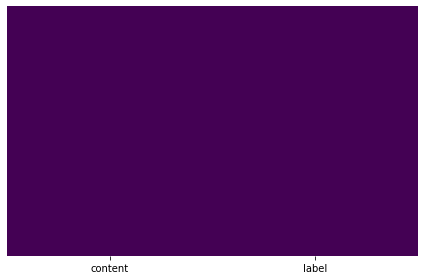

In [ ]:
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [ ]:
def load_data(path):
    df = pd.read_json(path, lines= True)
    
    df["label"] = df.annotation.apply(lambda x: x.get('label'))
    df["label"] = df.label.apply(lambda x: x[0])
    
    X = df.content.values
    y = df.label.values
    
    return X, y

In [ ]:
def tokenize(text):

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens
